In [1]:
import torch
from utils.plotting import plot_latent_tsne_grid, plot_latent_tsne_before_after
from models.models import SplitEncoder, SplitDecoder
from data.loader import get_dataloader
from utils.seed import set_seed

In [2]:
set_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
input_dim = 784
output_dim = 784
latent_dim = 64
signal_dim = 32
num_classes = 10

encoder_pre = SplitEncoder(input_dim=input_dim, latent_dim=latent_dim, signal_dim=signal_dim).to(device)
encoder_post = SplitEncoder(input_dim=input_dim, latent_dim=latent_dim, signal_dim=signal_dim).to(device)

In [4]:
!pwd

/isis/home/huynhc1/domain-alignment


In [5]:
ckpt_pre = torch.load("artifacts/mnist/mnist_pretrained_usage_swap_asym.pt", map_location=device)
ckpt_pst = torch.load("artifacts/mnist/mnist_finetuned.pt", map_location=device)
#encoder.load_state_dict(ckpt["encoder"])
#decoder.load_state_dict(ckpt["decoder"])

In [6]:
encoder_pre.load_state_dict(ckpt_pre["encoder"])
encoder_post.load_state_dict(ckpt_pst["encoder"])

<All keys matched successfully>

In [7]:
loader = get_dataloader("mnist", batch_size=256, train=False)

[t-SNE] Running joint projection...


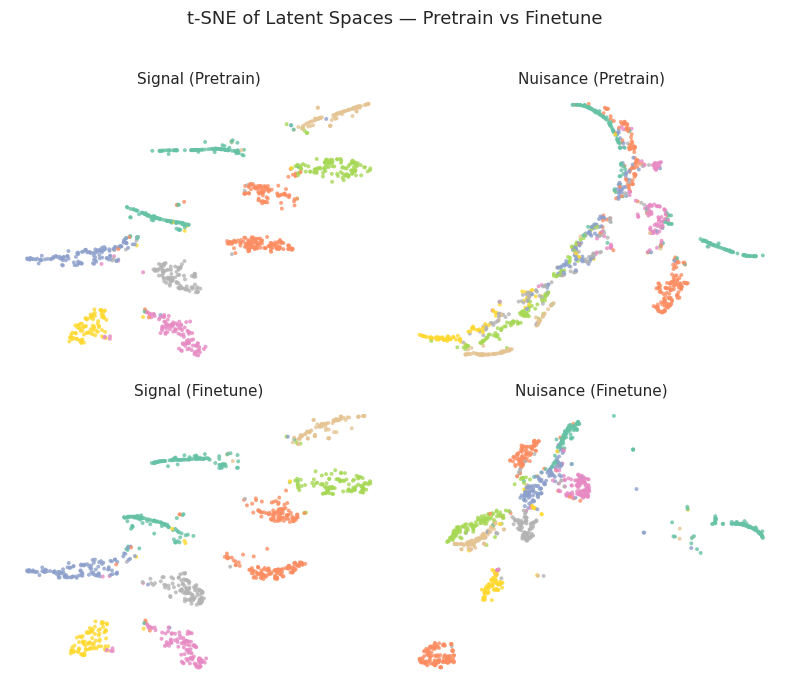

In [8]:
plot_latent_tsne_before_after(
    encoder_pre,
    encoder_post,
    loader,
    device,
    save_path=None,
    n_samples=1000,
    point_size=8,
    perplexity=30,
    random_state=42,
)

[t-SNE] Running joint projection...


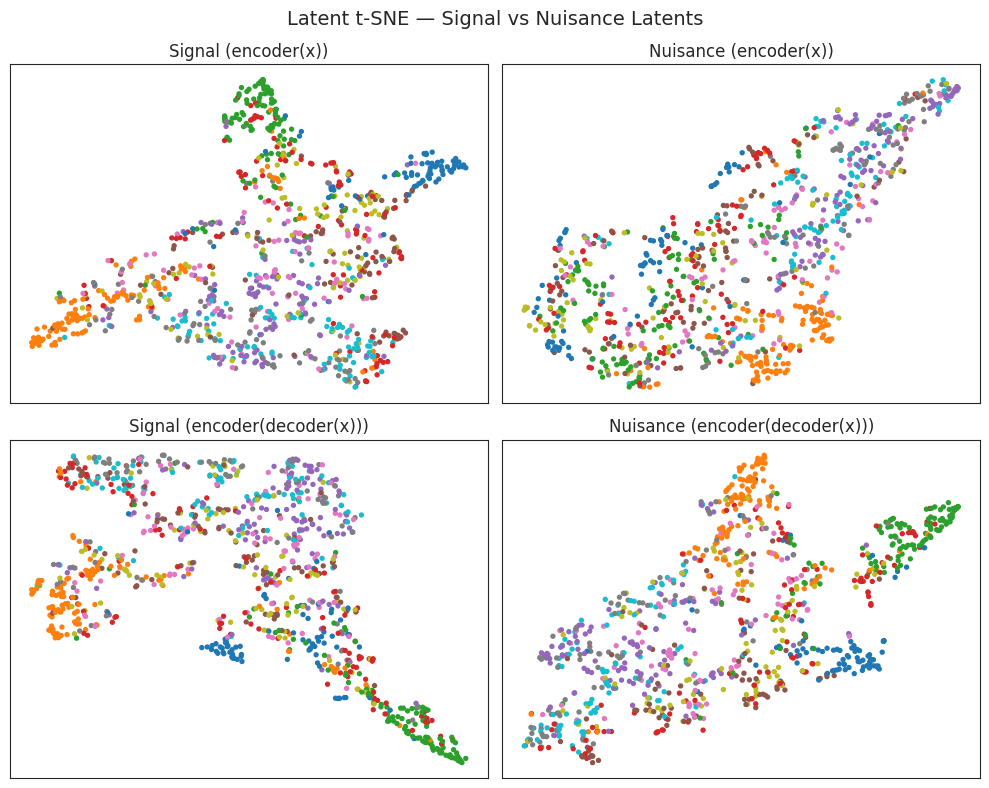

In [10]:
decoder = SplitDecoder().to(device)
plot_latent_tsne_grid(
    encoder_post,
    decoder,
    loader,
    device,
    save_path=None,
    n_samples=1000,
    title_prefix="Latent t-SNE",
    point_size=8,
    perplexity=30,
    random_state=42,
)
